# Data Wrangling for Credit Card Default Data

### Read the raw data

In [24]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv ("UCI_Credit_card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#### There are variables that need to be converted to categories:
#### SEX : 
             1 - Male
             2 - Female
#### EDUCATION:
             1 - Graduate School
             2 - University
             3 - High School
             4 - Others
             5 - unknown
             6 - unknown
#### MARRIAGE:
             1 - Married
             2 - Single
             3 - Others

In [108]:
# Check for any null values in the dataset.
df.isnull().values.any()

False

In [109]:
# Check for any duplicate records in the dataset
df.duplicated().value_counts()

False    30000
dtype: int64

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [123]:
df.rename(columns={'default.payment.next.month':'Default'}, inplace = True)

##### The education column of the dataset has many categories. It is necessary to reduce the categories for a better modelling.

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [10]:
df['EDUCATION'] = np.where(df['EDUCATION'] == 5 , 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 6 , 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 0 , 4, df['EDUCATION'])

In [11]:
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [12]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [53]:
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 4 , 0, df['MARRIAGE'])

In [54]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

## Exploratory Data Analysis

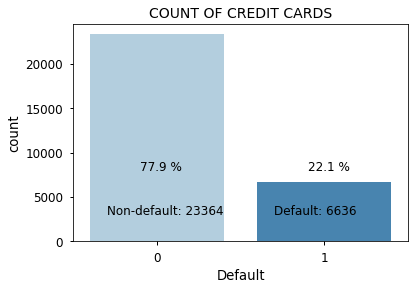

In [30]:
# The frequency of defaults
yes = df.Default.sum()
no = len(df)-yes
yes_perc = round(yes/len(df)*100,1)
no_perc = round(no/len(df)*100,1)

sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default', data=df, palette='Blues')
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
plt.show()

The data is imbalanced, since just 22% of the credit cards defaulted.  

### What features might predict card client default?

To answer this main question, I will answer to the following related questions:

    1. What is the proportion of defaults between men and women?
    2. What is the proportion of defaults based on level of education?
    3. What is the proportion of defaults based on marital status?
    4. Is proportion of defaults correlated with credit limit?
    5. Is age correlated to default? 
    6. Is the history of past payments predictive of the proportion of defaults?

## 1. What is the proportion of defaults between men and women?

In [31]:
default_sex = pd.crosstab(df['Default'], df['SEX'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1: 'Male', 2: 'Female'}

default_sex.rename(index = new_index, columns = new_columns, inplace=True)
default_sex

SEX,Male,Female,All
Default,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


There does not seem to be any reason to think that men would be likely to default than women or vice versa.

The proportion tells us that the proportion of default for men and women is roughly the same.

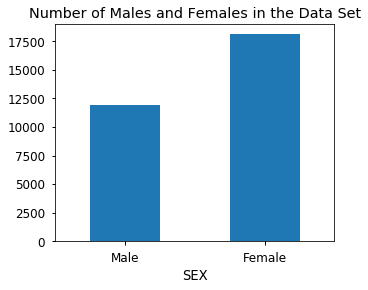

In [33]:
default_sex.loc['All'][0:2].plot.bar(figsize=(5,4), rot=0)
plt.title('Number of Males and Females in the Data Set')
plt.show()

In [34]:
#Normalize the table columns
default_sex_norm = default_sex / default_sex.loc['All']
default_sex_norm

SEX,Male,Female,All
Default,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


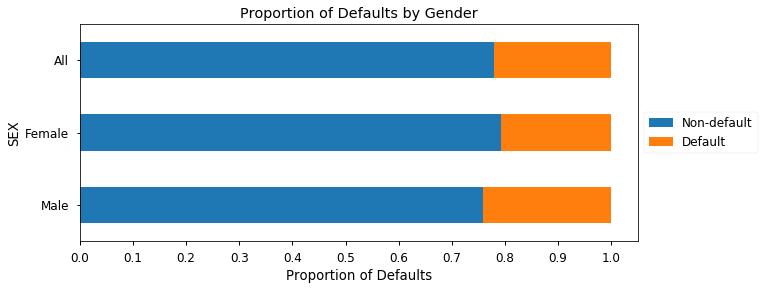

In [35]:
default_sex_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4), xticks=list(np.linspace(0, 1, 11)),
                                 rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Defaults by Gender')
plt.xlabel('Proportion of Defaults')
plt.show()

#### Observations:

* For the entire data set, approxiately 22.1% of the individuals defaulted.
* 24.2% of the males defaulted.
* 20.8% of the females defaulted.

The proportion of defaults for men is slightly higher than the proportion of defaults for women. However, this difference appears to be small and may not be statiscally significant.

#### Follow-up:
* Conduct a hypothesistest to check if the difference in teh proportion f the defaults for males and females is statistically significant.

## 2. What is the proportion of defaults based on level of education?

In [42]:
default_edu = pd.crosstab(df['Default'], df['EDUCATION'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}

default_edu.rename(index = new_index, columns = new_columns, inplace=True)
default_edu

EDUCATION,Graduate School,University,High School,Others,All
Default,,,,,
Non-default,8549,10700,3680,435,23364
Default,2036,3330,1237,33,6636
All,10585,14030,4917,468,30000


The data set contains:
* 10,585 individuals with graduate school educations;
* 14,030 individuals with university educations;
* 4,917 individuals with high school educations; and
* 468 individual categorized as others

Below we will check whether the proportion of defaults seem to decrease (or increase) as the level of education increases. We will look at the data to see if there appears to be any relationship between the proportion of defaults and the level of education

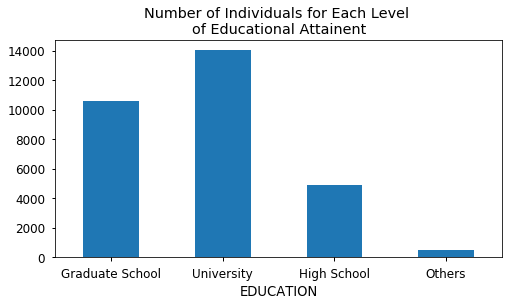

In [46]:
default_edu.loc['All'][0:4].plot.bar(figsize=(8,4), rot=0)
plt.title('Number of Individuals for Each Level \nof Educational Attainent')

plt.show()

In [47]:
default_edu_norm = default_edu / default_edu.loc['All']
default_edu_norm

EDUCATION,Graduate School,University,High School,Others,All
Default,,,,,
Non-default,0.807652,0.762651,0.748424,0.929487,0.7788
Default,0.192348,0.237349,0.251576,0.070513,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


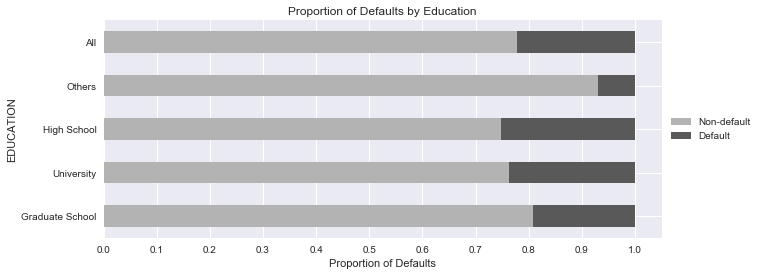

In [103]:
my_colors=['0.7','0.35',]
default_edu_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4), xticks=list(np.linspace(0, 1, 11)),
                                 rot=0, color=my_colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Defaults by Education')
plt.xlabel('Proportion of Defaults')
plt.show()

#### Observations:
* The proportion of defaults seems to decrease as the level of education increases

#### Follow-up:
* Conduct a hypothesis test to check if the differences in the proportion of defaults for each level of education is statistically signficant

## 3. What is the proportion of defualt based on marital status?

In [56]:
default_mar = pd.crosstab(df['Default'], df['MARRIAGE'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1: 'Married', 2: 'Single', 3: 'Divorce', 0: 'Others'}

default_mar.rename(index = new_index, columns = new_columns, inplace=True)
default_mar

MARRIAGE,Others,Married,Single,Divorce,All
Default,,,,,
Non-default,49,10453,12623,239,23364
Default,5,3206,3341,84,6636
All,54,13659,15964,323,30000


The data set contains information on the marital status of each individual. There are :
* 13,659 married individuals;
* 15,964 single individuals;
* 323 divorced individuals;
* 54 individuals categorized as 'others'.

Below we will check whether the proportion of defaults for each of these groups is roughly the same.

One might expect that divorced individuals would be more likely to default, because:

* The divorce process can inflict enormous legal expense;
* Divorced individuals may have larger housing costs than married couples, since divorced individuals can no longer save on housing expenses through cohabitation with their (former) spouse.

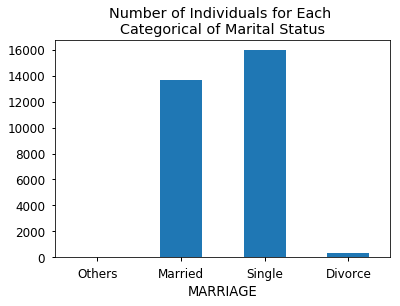

In [57]:
default_mar.loc['All'][0:4].plot.bar(figsize=(6,4), rot=0)
plt.title('Number of Individuals for Each \nCategorical of Marital Status')

plt.show()

In [58]:
default_mar_norm = default_mar / default_mar.loc['All']
default_mar_norm

MARRIAGE,Others,Married,Single,Divorce,All
Default,,,,,
Non-default,0.907407,0.765283,0.790717,0.739938,0.7788
Default,0.092593,0.234717,0.209283,0.260062,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


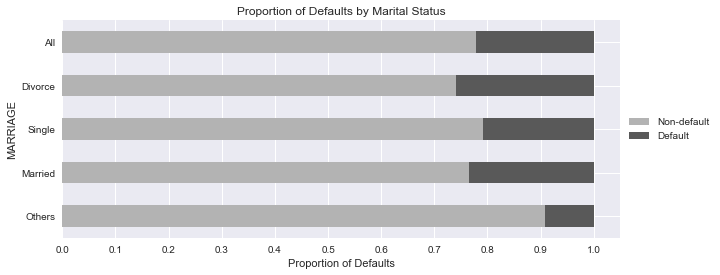

In [104]:
my_colors=['0.7','0.35',]
default_mar_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4), xticks=list(np.linspace(0, 1, 11)),
                                 rot=0, color=my_colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Defaults by Marital Status')
plt.xlabel('Proportion of Defaults')
plt.show()

#### Observations:
* The proportions of defaults seems to be highest for divorced individuals and lowest of single individuals (we are ignoring "Others").

The relatively high default rate among divorced individuals fits with our intuition that divorced individuals would be more likely to default, since:

* The divorce process can inflict enormous legal expense;
* They might have higher housing cost than married couples.

#### Follow-up
* Conduct a hypothesis test to check if the differences in the proportion of default for each category of marital status is statistically significant

## 4. Is the history of past repayments status predictive of the proportion of defaults?

For each observation, the data set contains payment records for the past 6 months (from April to September, 2005). There is a feature variable for each month. The variable can take on any integer value within the range of 0 to 9, where each integer stands for the following categories:

* 0: Revolving credit
* 1: Payment delay one month
* 2: Payment delay two months
* 3: Payment delay three months
* ..
* 8: Payment delay eight months
* 9: Payment delay nine months and above

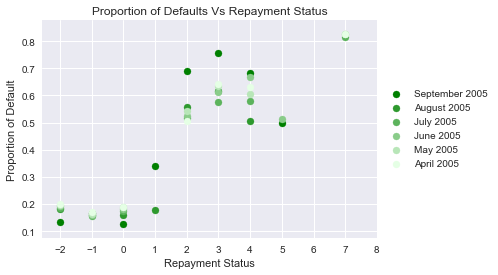

In [143]:
paymentlist = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
dict_label ={'PAY_0': 'September 2005',
            'PAY_2': 'August 2005',
            'PAY_3': 'July 2005',
            'PAY_4': 'June 2005',
            'PAY_5': 'May 2005',
            'PAY_6': 'April 2005'}

df_pay = {}

for i in paymentlist:
    df_pay[i] = df.groupby([i, 'Default']).size().unstack()
    df_pay[i] = df_pay[i][df_pay[i].sum(axis=1)>25]
    df_pay[i] = df_pay[i].div(df_pay[i].sum(axis=1), axis = 'index')
    
for i in paymentlist:
    plt.scatter(x=df_pay[i].index, y=df_pay[i][1], label=dict_label.get(i))
ticks =[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(ticks, rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_palette(sns.light_palette("green", reverse=True))
plt.title('Proportion of Defaults Vs Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Proportion of Default')
plt.show()

#### Observation(s):
* The proportion of defaults for observation with payment delay 2 or more months are much higher than the other observations

## 5. Is the age correlated with proportions?

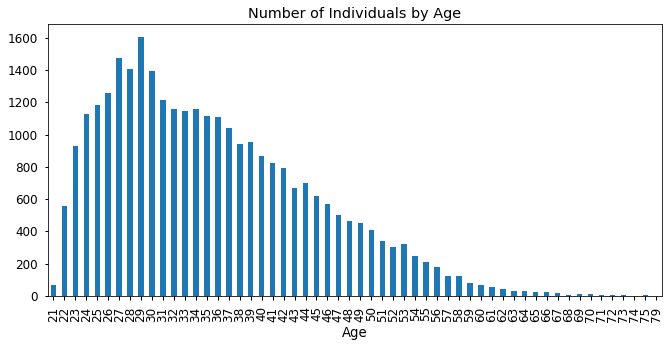

In [81]:
age_count.plot.bar(figsize=(11,5))
plt.title('Number of Individuals by Age')
plt.xlabel('Age')
plt.show()

In [80]:
default_age = pd.crosstab(df['Default'], df['AGE'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }

default_age.rename(index = new_index, inplace=True)
default_age

AGE,21,22,23,24,25,26,27,28,29,30,...,68,69,70,71,72,73,74,75,79,All
Default,,,,,,,,,,,,,,,,,,,,,
Non-default,53,391,684,827,884,1003,1164,1123,1292,1121,...,4,12,8,3,2,1,1,2,1,23364
Default,14,169,247,300,302,253,313,286,313,274,...,1,3,2,0,1,3,0,1,0,6636
All,67,560,931,1127,1186,1256,1477,1409,1605,1395,...,5,15,10,3,3,4,1,3,1,30000


In [82]:
default_age_norm = default_age / default_age.loc['All']
default_age_norm

AGE,21,22,23,24,25,26,27,28,29,30,...,68,69,70,71,72,73,74,75,79,All
Default,,,,,,,,,,,,,,,,,,,,,
Non-default,0.791045,0.698214,0.734694,0.733807,0.745363,0.798567,0.788084,0.797019,0.804984,0.803584,...,0.8,0.8,0.8,1.0,0.666667,0.25,1.0,0.666667,1.0,0.7788
Default,0.208955,0.301786,0.265306,0.266193,0.254637,0.201433,0.211916,0.202981,0.195016,0.196416,...,0.2,0.2,0.2,0.0,0.333333,0.75,0.0,0.333333,0.0,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.000000,1.00,1.0,1.000000,1.0,1.0000


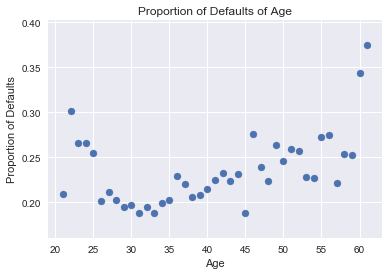

In [124]:
# Plot the proportion of defaults by age with atleast 50 observations

my_df = df.groupby(['AGE', 'Default']).size().unstack()
my_df = my_df[my_df.sum(axis=1)>50]
my_df = my_df.div(my_df.sum(axis=1), axis='index')

plt.scatter(x=my_df.index, y=my_df[1])
plt.title('Proportion of Defaults of Age')
plt.ylabel('Proportion of Defaults')
plt.xlabel('Age')
plt.show()

#### Observations:
* The proportion seems to be on a decline from early 20s to th early 30s and increases from there on.
* The proportion are non-linearly related with age.

#### Follow-up
* Conduct a logistic regression where age is the predictor variable and defaut status might be the target.